# 1. 20230403 기준 krx API를 이용해 시총 top10 업종명, 업종코드, 종가를 가져오기
- stock.get_market_cap('20230403')
- 

In [1]:
from pykrx import stock
from pykrx import bond
import FinanceDataReader as fdr

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



## 1-1. stock.get_market_cap('20230403')

In [7]:
from pykrx import stock
df =stock.get_market_cap('20230403')[:10]
top10_idx_list = df['시가총액'].index
df = df.reset_index()

In [8]:
name_list = []
for i, ticker in enumerate(top10_idx_list):
    종목 = stock.get_market_ticker_name(ticker)
    name_list.append(종목)
    print(종목, ticker)
df['업종명'] = name_list

삼성전자 005930
LG에너지솔루션 373220
SK하이닉스 000660
삼성바이오로직스 207940
삼성SDI 006400
LG화학 051910
삼성전자우 005935
현대차 005380
POSCO홀딩스 005490
기아 000270


In [9]:
df = df[['티커','업종명','종가']]
df.columns=['업종코드','업종명','종가']
df

,업종코드,업종명,종가
0,005930,삼성전자,63100
1,373220,LG에너지솔루션,586000
2,000660,SK하이닉스,87200
3,207940,삼성바이오로직스,778000
4,006400,삼성SDI,745000
5,051910,LG화학,712000
6,005935,삼성전자우,53800
7,005380,현대차,183600
8,005490,POSCO홀딩스,392000
9,000270,기아,81200


## 1-2. get_market_ohlcv이용 ('20230403','20230425')의 종가 

In [12]:
import pandas as pd
df_list = []
col_list = []
for i,종목코드 in enumerate(top10_idx_list):
    이름 = stock.get_market_ticker_name(종목코드)
    col_list.append(이름)
    ohlcv_df = stock.get_market_ohlcv('20230403','20230425',종목코드)
    df_list.append(ohlcv_df['종가']) 
        
tot_df = pd.concat(df_list,axis=1)
tot_df.columns = col_list
tot_df

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,삼성SDI,LG화학,삼성전자우,현대차,POSCO홀딩스,기아
날짜,,,,,,,,,,
2023-04-03,63100,586000,87200,778000,745000,712000,53800,183600,392000,81200
2023-04-04,63600,575000,84500,788000,726000,722000,53700,183800,367000,80100
2023-04-05,63900,588000,84600,788000,778000,732000,53800,186700,373500,81300
2023-04-06,62300,580000,83800,805000,745000,716000,53100,185100,362500,81000
2023-04-07,65000,580000,89100,796000,738000,714000,54800,185100,369500,80100
2023-04-10,65700,596000,90700,803000,749000,750000,55800,185900,398500,81000
2023-04-11,65900,610000,91800,812000,767000,806000,55300,192100,397000,85000
2023-04-12,66000,590000,90300,800000,764000,775000,55600,198200,406500,86100
2023-04-13,66100,599000,88700,815000,769000,802000,55000,198900,391500,86600


In [18]:
tot_df.to_csv('../datasets/kospi_top10.csv')

# 수익률로 데이터프레임을 바꾸기
* 수익률로 지수화
* ret_df

In [13]:
ret_df = tot_df.pct_change() 
ret_df.fillna(method='bfill',inplace = True)
ret_df

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,삼성SDI,LG화학,삼성전자우,현대차,POSCO홀딩스,기아
날짜,,,,,,,,,,
2023-04-03,0.007924,-0.018771,-0.030963,0.012853,-0.025503,0.014045,-0.001859,0.001089,-0.063776,-0.013547
2023-04-04,0.007924,-0.018771,-0.030963,0.012853,-0.025503,0.014045,-0.001859,0.001089,-0.063776,-0.013547
2023-04-05,0.004717,0.022609,0.001183,0.000000,0.071625,0.013850,0.001862,0.015778,0.017711,0.014981
2023-04-06,-0.025039,-0.013605,-0.009456,0.021574,-0.042416,-0.021858,-0.013011,-0.008570,-0.029451,-0.003690
2023-04-07,0.043339,0.000000,0.063246,-0.011180,-0.009396,-0.002793,0.032015,0.000000,0.019310,-0.011111
2023-04-10,0.010769,0.027586,0.017957,0.008794,0.014905,0.050420,0.018248,0.004322,0.078484,0.011236
2023-04-11,0.003044,0.023490,0.012128,0.011208,0.024032,0.074667,-0.008961,0.033351,-0.003764,0.049383
2023-04-12,0.001517,-0.032787,-0.016340,-0.014778,-0.003911,-0.038462,0.005425,0.031754,0.023929,0.012941
2023-04-13,0.001515,0.015254,-0.017719,0.018750,0.006545,0.034839,-0.010791,0.003532,-0.036900,0.005807


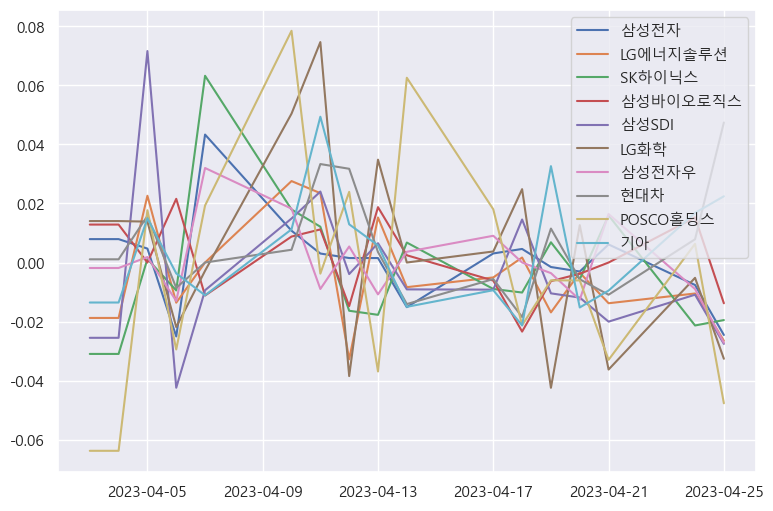

In [19]:
plt.figure(figsize=(9, 6))
for 이름 in ret_df.columns:
    plt.plot(ret_df.index, ret_df[이름], label=이름)

plt.legend()
plt.show()

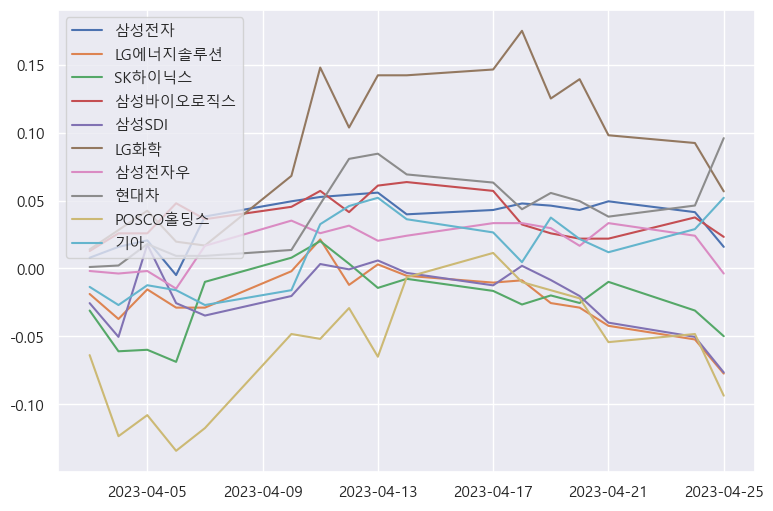

In [16]:
plt.figure(figsize=(9, 6))
for 이름 in ret_df.columns:
    plt.plot(ret_df.index, (ret_df[이름]+1).cumprod()-1,label=이름)

plt.legend()
plt.show()